# WeatherPy


# Data Analysis:

1)

2)

3)


In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed, skip cities not found


In [8]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key 
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=9d88a4e32284086ca01a89386c890bf8'

In [13]:
# set up lists to hold reponse info
city_names = []
longitudes = []
latitudes = []
max_temps = []
humidities = []
cloudiness1 = []
wind_speeds = []
countries = []
dates = []
#city_ids = []
count = 0

print(f"Beginning Data Retrieval: \n")
print(f"------------------------\n" )
# Loop through the list of cities and perform a request for data on each

for city in cities:
    city_url = query_url + "&q=" + city + "&units=imperial"
    count += 1 
# Get weather data
    weather_response = requests.get(city_url)
    weather_json = weather_response.json()

# Try to grab the city name and id if they are available in the weather API
    try:
        
        city_name = weather_json['name']
        longitude = weather_json['coord']['lon']
        latitude = weather_json['coord']['lat']
        max_temp = weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        cloudiness = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        country = weather_json['sys']['country']
        date = weather_json['dt']
        #city_id = weather_json['id']
        
        city_names.append(city_name)
        longitudes.append(longitude)
        latitudes.append(latitude)
        max_temps.append(max_temp)
        humidities.append(humidity)
        cloudiness1.append(cloudiness)
        wind_speeds.append(wind_speed)
        countries.append(country)
        dates.append(date)
        #city_ids.append(city_id)

        print(f"Processing Record {count} | {city_name}")
        
# Handle exceptions for a city that is not available in the weather API
    except:
        # Append null values
        print(f"City not found. Skipping...")
        pass
 

Beginning Data Retrieval: 

------------------------

Processing Record 1 | Thinadhoo
Processing Record 2 | Xam Nua
Processing Record 3 | Qaanaaq
Processing Record 4 | Spring Hill
City not found. Skipping...
Processing Record 6 | Puqi
Processing Record 7 | Haines Junction
Processing Record 8 | Dingalan
Processing Record 9 | Fairbanks
Processing Record 10 | Rikitea
Processing Record 11 | Mar del Plata
Processing Record 12 | Kudahuvadhoo
City not found. Skipping...
Processing Record 14 | Lobito
Processing Record 15 | Tezu
Processing Record 16 | Hobart
City not found. Skipping...
Processing Record 18 | Porosozero
Processing Record 19 | New Norfolk
Processing Record 20 | Clyde River
Processing Record 21 | Punta Arenas
Processing Record 22 | Nālūt
Processing Record 23 | Lavrentiya
Processing Record 24 | Nuuk
Processing Record 25 | Geraldton
Processing Record 26 | Winnemucca
City not found. Skipping...
Processing Record 28 | Bluff
Processing Record 29 | Port-Cartier
Processing Record 30 | Ja

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
# create a data frame 
weather_dict = {
    "City": city_names,
    "Latitude": latitudes,
    "Longitude": longitudes,
    "Max Temp": max_temps,
    "Humidity": humidities,
    "Cloudiness": cloudiness1,
    "Wind Speed": wind_speeds,
    "Country": countries,
    "Date": dates
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thinadhoo,0.53,72.93,84.97,68,4,6.15,MV,1594695892
1,Xam Nua,20.42,104.04,86.86,45,1,1.03,LA,1594695918
2,Qaanaaq,77.48,-69.36,42.33,70,1,3.60,GL,1594695918
3,Spring Hill,28.48,-82.53,82.00,88,1,7.61,US,1594695919
4,Puqi,29.72,113.88,85.26,73,100,4.27,CN,1594695919
...,...,...,...,...,...,...,...,...,...
552,Shingū,33.73,135.98,77.00,100,75,10.29,JP,1594696057
553,Honningsvåg,70.98,25.97,46.40,75,75,8.05,NO,1594695763
554,George Town,5.41,100.34,84.20,83,40,4.70,MY,1594695805
555,Beloha,-25.17,45.05,57.47,93,20,2.64,MG,1594695761


In [15]:
# export to csv
weather_data.to_csv (r'C:\Users\cdfen\Documents\Python-API-Challenge\Weatherpy\weatherdf.csv', index = False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.


In [17]:
# create a dataframe to see if there are any humidity values over 100
humidity_100plus = weather_data.loc[weather_data["Humidity"] > 100]
humidity_100plus

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [18]:
# No values of humidity are over 100
# no need to create a new 'clean' dataframe, can utilize weather_data above and already exported csv file

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature vs. Latitude Plot

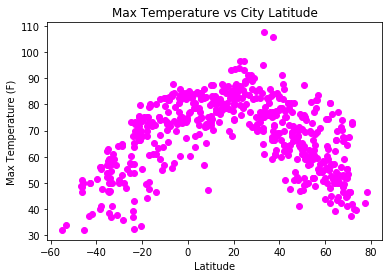

<Figure size 432x288 with 0 Axes>

In [19]:
# Create a Scatter Plot for temperature vs latitude 
x_values = weather_data['Latitude']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values, color='magenta')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Max Temperature vs City Latitude')
plt.show()
plt.savefig('temp_vs_lat')

Analysis:



## Humidity vs. Latitude Plot

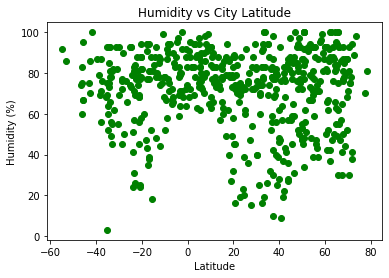

<Figure size 432x288 with 0 Axes>

In [20]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values, color='g')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Humidity vs City Latitude')
plt.show()
plt.savefig('humidity_vs_lat')

Analysis:



## Cloudiness vs. Latitude Plot

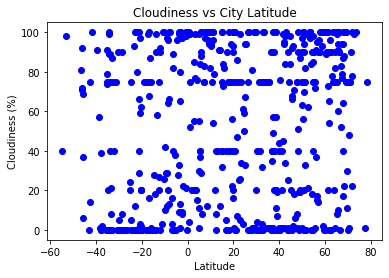

<Figure size 432x288 with 0 Axes>

In [21]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values, color='b')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Cloudiness vs City Latitude')
plt.show()
plt.savefig('cloudiness_vs_lat')

Analysis:


## Wind Speed vs. Latitude Plot

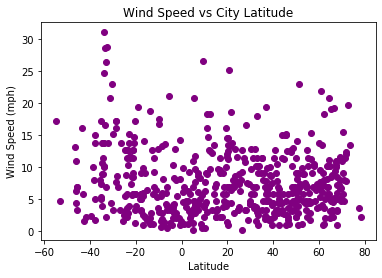

<Figure size 432x288 with 0 Axes>

In [22]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values, color='purple')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Wind Speed vs City Latitude')
plt.show()
plt.savefig('wind_speed_vs_lat')

Analysis:


## Linear Regression

In [23]:
# OPTIONAL: Create a function to create Linear Regression plots

In [24]:
# Create Northern and Southern Hemisphere DataFrames
N_hem = weather_data.loc[weather_data["Latitude"] > 0]
S_hem = weather_data.loc[weather_data["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [25]:
#NEED TO CHANGE TO N and S Hemispheres
x_val = N_hem['Latitude']
y_val = N_hem['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

# Get regression values
regress_values = x_val * slope + intercept
print(regress_values)

0      87.018831
1      78.208149
2      52.932255
3      74.637807
4      74.088524
         ...    
546    60.072939
550    74.859292
552    72.312212
553    55.811563
554    84.857135
Name: Latitude, Length: 383, dtype: float64


In [26]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.44x +87.25


The r-squared is: 0.45506897894028436


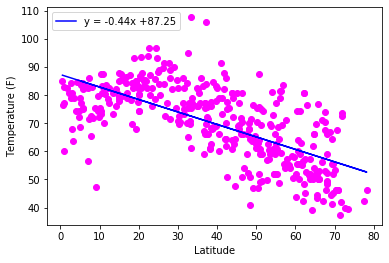

In [27]:
# Create Plot
plt.scatter(x_val,y_val, color = 'magenta')
plt.plot(x_val,regress_values,"r-", color = 'b', label = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2)))

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.legend(loc="upper left")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression